In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects/scripts/hemato_figures"

In [2]:
setwd("../..")

In [3]:
library(metacell)
#library(dendextend)
#library(DESeq2)
#library(RColorBrewer)
#library(GEOquery)

source("../tuft/scripts/metacell_functions.r")
scdb_init("saved_work", force=T)

Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: plotrix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotrix’”
initializing scdb to saved_work



In [4]:
id = "hemato_clodronate"

In [5]:
#suffix = "_annotated"; id_f = paste0(id, suffix)
suffix = "_f"; id_f = paste0(id, suffix)
sc_2d = scdb_mc2d(id); sc_cl = scdb_mc(paste0(id, suffix)); sc_mat = scdb_mat(id)

cells = names(sc_cl@mc)
cell_stats = sc_mat@cell_metadata[cells,]
colnames(cell_stats) = gsub(" ", ".", colnames(cell_stats))
colnames(cell_stats) = gsub("\\(|\\)", "_", colnames(cell_stats))
fp = sc_cl@mc_fp
lfp = log2(sc_cl@mc_fp)
outdir = paste0("figures/clodronate/")
dir.create(outdir)


Warning message in dir.create(outdir):
“'figures/clodronate' already exists”


color_scheme = sc_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group
sc_names = color2name[ sc_cl@colors[ sc_cl@mc]]; names(sc_names) = names(sc_cl@mc)
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

write.table(setdiff(names(table(sc_names)), lin_ord), quote=F, row.names=F)
setdiff(names(table(sc_names)), lin_ord)
setdiff(lin_ord, names(table(sc_names)))

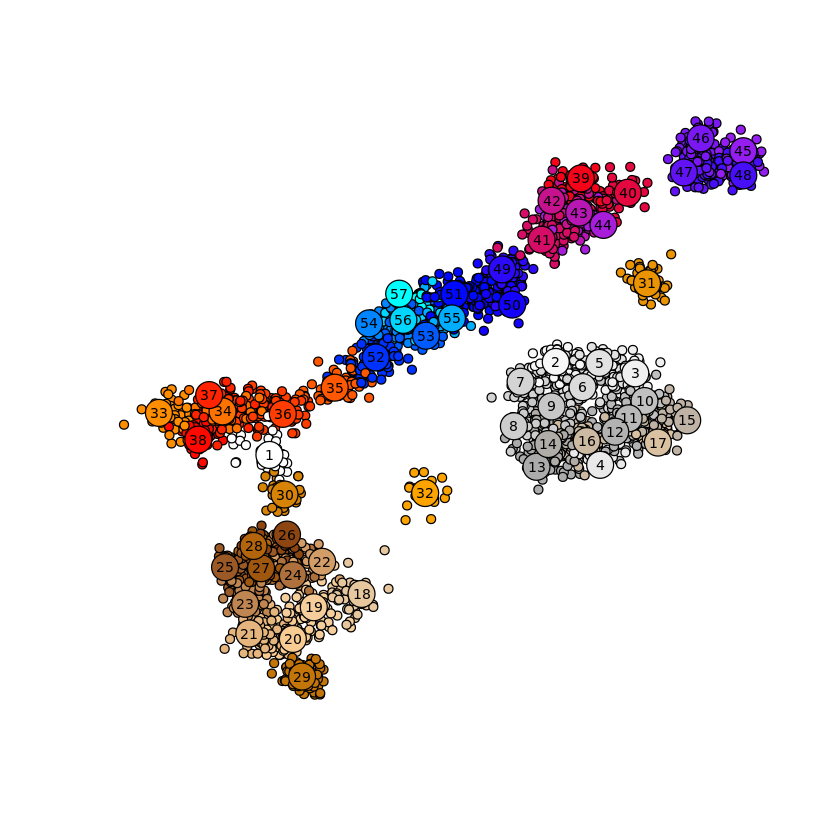

In [6]:
p = function() {
    plot(sc_2d@sc_x, sc_2d@sc_y, pch = 21, bg = sc_cl@colors[ sc_cl@mc], axes=F, xlab = "", ylab = "")
    points(sc_2d@mc_x, sc_2d@mc_y, cex = 3, pch = 21, bg = sc_cl@colors)
    text(sc_2d@mc_x, sc_2d@mc_y, names(sc_2d@mc_x), cex = 0.7)
}

p()


[1] 13740    57

zlim: -7.27983539215172<>7.27983539215172



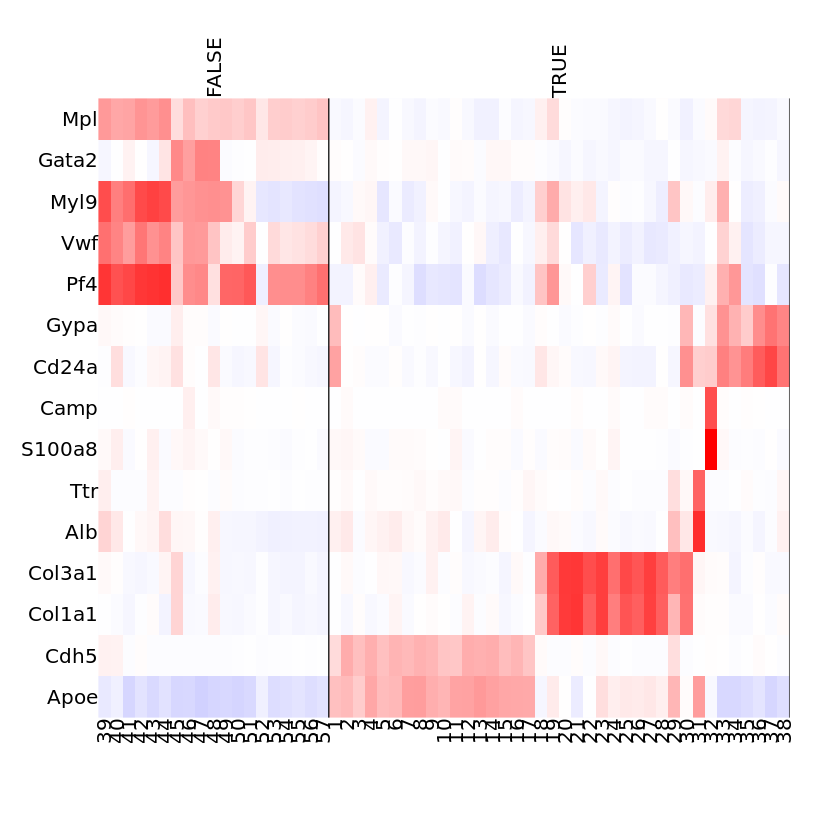

In [7]:
# remove all other cells

dim(lfp)

neg_nms = c("Apoe", "Cdh5",           # Endothelium
        "Col1a1", "Col3a1",      # Fibroblasts
        "Alb", "Ttr",            # Epithelium
        "S100a8", "Camp",        # Neutrophils
        "Cd24a", "Gypa")

pos_nms = c("Pf4", "Vwf", "Myl9", "Gata2", "Mpl")

nms = union(neg_nms, pos_nms)
IM = lfp[nms,]
image.2(IM, balance = T, vct = (colSums(lfp[ neg_nms,] > 1.5) > 0))

In [8]:
comb =  with(cell_stats, paste0(Tissue, "@", Replicate)); names(comb) = rownames(cell_stats)
names(comb) = rownames(cell_stats)
table(comb)

comb
Clodronate-depletion@1 Clodronate-depletion@2 Clodronate-depletion@3 
                   987                    831                    572 
   Control-depletion@1    Control-depletion@2    Control-depletion@3 
                    16                     16                    583 
   Control-depletion@4 
                   329 

In [9]:
good_mcs = names(which(colSums(lfp[ neg_nms,] > 1.5) == 0))
good_cells = names(sc_cl@mc)[ sc_cl@mc %in% good_mcs]
good_mcs
length(good_cells)

[1] "39" "40" "41" "42" "43" "44" "45" "46" "47" "48" "49" "50" "51" "52" "53"
[16] "54" "55" "56" "57"

[1] 1194

In [10]:
table(cell_stats[ good_cells, "Tissue"])


Clodronate-depletion    Control-depletion 
                 774                  420 

In [ ]:
par(mar = c(15,5,1,1))
barplot(sort(tapply(names(comb) %in% good_cells, comb, mean)), las = 2)

In [ ]:
umis = read_large_umis(id, cells = good_cells)
dim(umis)

In [ ]:
ref_id = "hemato_liver_megk"
ref_cl = scdb_mc(paste0(ref_id, "_f"))
ref_2d = scdb_mc(paste0(ref_id, "-only"))
ref_lfp = log2(ref_cl@mc_fp)

bad_mc = "12"
ref_cells = names(which(scdb_mc("hemato_liver_megk-only")@mc != bad_mc))
length(ref_cells)

In [ ]:
annotations = as.matrix(read.delim(paste0("config/", ref_id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

In [ ]:
ref_color_scheme = ref_cl@color_key
ref_color_scheme
color2name = as.vector(ref_color_scheme$group); names(color2name) = ref_color_scheme$color
name2color = as.vector(ref_color_scheme$color); names(name2color) = ref_color_scheme$group


In [ ]:
markers = names(scdb_gset(ref_id)@gene_set)
markers

In [ ]:
ref_umis = read_large_umis("hemato_liver_all", cells = ref_cells)
dim(ref_umis)

In [ ]:
shared_genes = intersect(rownames(ref_umis), rownames(umis))
length(shared_genes)

In [ ]:
both_umis = cbind(ref_umis[ shared_genes,], umis[ shared_genes, good_cells])
dim(both_umis)

In [ ]:
clusts = proj_sc_on_clusts(both_umis, new_cells = good_cells, old_cells = ref_cells, clusts = ref_cl@mc[ ref_cells], 
                           markers = intersect(rownames(both_umis), markers))
table(clusts)

In [ ]:
args(proj_ds_on_graph)

In [ ]:
coords = proj_ds_on_graph(paste0(ref_id, "-only"), paste0(ref_id, "-only"), ref_id, 
                          markers = intersect(rownames(both_umis), markers), umis = umis,
                          K = 20)

In [ ]:
treatment = cell_stats[ good_cells, "Tissue"]
names(treatment) = good_cells
l = c("Control-depletion", "Clodronate-depletion")

In [ ]:
ref_2d = scdb_mc2d(paste0(ref_id, "-only"))

In [ ]:
sc_x = coords$coords$x
sc_y = coords$coords$y

#pdf(paste0(outdir, "/2d_projection.pdf"), useDingbats = F, height = 5, width = 5)
plot.2(ref_2d@sc_x[ ref_cells], ref_2d@sc_y[ ref_cells], col = ref_cl@colors[ ref_cl@mc[ ref_cells]])
cells = sample(names(sc_x))
points(sc_x[ cells], sc_y[ cells], pch = 21, cex = 1, bg = ifelse(treatment[ cells] == "Clodronate-depletion", "gray20", "gray80"))
#dev.off()

In [ ]:
library(KernSmooth)
library(scales)


In [ ]:

pdf(paste0(outdir, "/2d_projection.pdf"), useDingbats = F, height = 5, width = 10)
par(mfrow = c(1,2))
l = rev(names(table(treatment)))

for (c in l) {
    #plot.2(ref_2d@sc_x[ ref_cells], ref_2d@sc_y[ ref_cells], col = alpha(ref_cl@colors[ ref_cl@mc[ ref_cells]], 0.3), main = c, cex = 0.5)
    plot.2(ref_2d@sc_x[ ref_cells], ref_2d@sc_y[ ref_cells], col = alpha("gray", 0.5), main = c, cex = 0.5)
    cells = intersect(names(sc_x), names(which(treatment == c)))
    dens = bkde2D(cbind(sc_x[ cells], sc_y[cells]), bandwidth = c(1, 1), gridsize = c(25, 25))
    contour(dens$x1, dens$x2, dens$fhat, add = T, drawlabels = FALSE, lwd = 2)
    points(sc_x[ cells], sc_y[cells], pch = 20, col = ref_cl@colors[ clusts[ cells]], cex = 0.7)
}
dev.off()

In [ ]:

pdf(paste0(outdir, "/2d_projection_take2.pdf"), useDingbats = F, height = 5, width = 10)
par(mfrow = c(1,2))
l = rev(names(table(treatment)))

for (c in l) {
    plot.2(ref_2d@sc_x[ ref_cells], ref_2d@sc_y[ ref_cells], col = "gray", main = c, cex = 0.5)
    cells = intersect(names(sc_x), names(which(treatment == c)))
    #dens = bkde2D(cbind(sc_x[ cells], sc_y[cells]), bandwidth = c(1, 1), gridsize = c(25, 25))
    #contour(dens$x1, dens$x2, dens$fhat, add = T, drawlabels = FALSE, lwd = 2)
    points(sc_x[ cells], sc_y[cells], pch = 21, bg = ref_cl@colors[ clusts[ cells]], cex = 1)
}
dev.off()

In [ ]:
c
    cells = intersect(names(sc_x), names(which(treatment[ cells] == c)))
length(cells)

In [ ]:
pops = intersect(colnames(dist_n), lin_ord)#
pops = lin_ord[4:7]
pops

In [ ]:
total_dist[ rownames(sample_dist)]
rowSums(sample_dist)

In [ ]:
clust_names = color2name[ ref_cl@colors[ clusts]]; 
names(clust_names) = names(clusts)

sample_dist = table(comb[ names(clust_names)], clust_names)
sample_dist = sample_dist[ rowSums(sample_dist) > 20, pops]

total_dist = table(comb)
dist_n_2 = sample_dist / c(total_dist[ rownames(sample_dist)])
dist_n = sample_dist / c(total_dist[ rownames(sample_dist)]) #rowSums(sample_dist)

p = function(X) {
    par(mar = c(15,5,0,0), fig = c(0,0.6,0,1))
    barplot(t(X), col = name2color[ colnames(dist_n)], las = 2, ylim = c(0,1))
    par(mar = c(1,1,0,0), fig = c(0.6,1,0,1), new = T)
    plot.empty()
    legend("topleft", colnames(X), pch = 21, pt.bg = name2color[ colnames(X)])
}

#p(dist_n_2)
p(dist_n)
#pdf(paste0(outdir, "/sample_dist.pdf"), useDingbats = F)
#p()
#dev.off()

In [ ]:
samp2treat = vecsplit(rownames(sample_dist), "@", 1)
l = rev(names(table(samp2treat)))
samp2treat = factor(samp2treat, levels = l)
names(samp2treat) = rownames(sample_dist)
table(samp2treat)

In [ ]:
lin_ord

In [ ]:
megk_cells = names(clust_names)[ clust_names %in% pops]

par(mar = c(15,3,1,1))
megk_freq = tapply(names(comb) %in% megk_cells, comb, mean)
megk_freq = megk_freq[ rownames(dist_n)]
mean_val = tapply(megk_freq, samp2treat[names(megk_freq)], mean)

pdf(paste0(outdir, "/megk_dist.pdf"), height = 5, width = 2.5)
coords = barplot(mean_val, las = 2, ylim = c(0,max(megk_freq) * 1.05), space = 0, col = c("white", alpha("gray20", 0.5)))
names(coords) = names(mean_val)
points( coords[ samp2treat[ names(megk_freq)]] + runif(length(megk_freq), -0.1, 0.1), megk_freq, pch = 21, bg = "gray20", cex = 2)
dev.off()

In [ ]:
library(scales)

In [ ]:
pop = "Megakaryocytes_early"
Y = dist_n[,pops]
mean_vals = apply(Y, 2, tapply, samp2treat[ rownames(Y)], mean)
cols = mean_vals
cols["Control-depletion",] = "white"
cols["Clodronate-depletion",] = alpha(name2color[ colnames(Y)], 0.5)

borders = mean_vals
borders["Control-depletion",] = name2color[ colnames(Y)]
borders["Clodronate-depletion",] = "black"

pdf(paste0(outdir, "/sample_dist.pdf"), height = 5, width = 7)
par(mar = c(13,3, 1,1))
coords = barplot(mean_vals, beside = T, las = 2, ylim = c(0, max(Y) * 1.05),
                col = cols, border = borders)
dimnames(coords) = dimnames(mean_vals)
points(coords[ samp2treat[ rownames(Y)],] + runif(length(Y), -0.2, 0.2), Y, pch = 21, bg = rep(name2color[ pops], each = nrow(Y)), cex = 2) 
dev.off()

In [ ]:
bad_mc = c()
clust_ord = setdiff(order(factor(color2name[ sc_cl@colors], levels = lin_ord)), bad_mc)


In [ ]:
bad_genes = grep("^Rpl|^Rps|^Snor|Gm[0-9]", sc_mat@genes, v=T)
nms = choose_genes_from_clust("hemato_liver_megk-only", "hemato_liver_megk-only", nms_per_clust=15, nms_thresh=0.8, ord = "max.col", bad_genes = bad_genes,
                             must_haves = c("Pf4", "Myl9"))
length(nms)
nms

In [ ]:
nms = c("Cd24a", "Kit",  "Myb", "Car1", "Klf1", "Serpina3g", "Gata2", "Vwf",
          "Thbs1", "Alox12", "Ppbp", "Tpm4", "Clu", "Tsc22d1", "Myl9")


In [ ]:
good_cells = names(clusts)
umis_n = sweep(umis, 2, colSums(umis), "/") * 1000
foc = log(1 + 7 * umis_n)

In [ ]:
treat = cell_stats$Tissue
names(treat) = rownames(cell_stats)
table(treat)

In [ ]:
IM = foc[intersect(nms, rownames(foc)), good_cells]
zlim = c(0, max(IM))

genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

vct = factor(clust_names[ good_cells], levels = intersect(lin_ord, names(table(clust_names))))
names(vct) = good_cells
table(vct)

In [ ]:
treats = c("Control-depletion", "Clodronate-depletion")
figs = c(0,0.45,0.9)
p = function() {
    zlim = c(0, max(IM))
    for (i in seq_along(treats)) {
        c = treats[i]
        par(mar = c(0.5,10,0.5,0.5), fig = c(figs[i], figs[i + 1], 0.1,1), new = (i > 1))
        sub_cells = intersect(good_cells, names(which(treat == c)))
        IM2 = IM[,sub_cells];
        IM2 = IM2[, order(vct[ sub_cells])]
        image.2(IM2, col = genes_shades, vct = vct[ colnames(IM2)], annotate = "rows", zlim = zlim); title(c); box()
        par(fig = c(figs[i], figs[i + 1], 0, 0.1), new = T)
        image(matrix(seq_len(ncol(IM2))), axes = F, col = name2color[ clust_names[ colnames(IM2)]]); box()
    }
    par(mar = c(0.5,0.5,0.5,3), fig = c(0.91,0.98,0.1,0.3), new = T)
    ax = seq(zlim[1], zlim[2], length.out = length(genes_shades))
    image(y = ax, z = t(seq_along(ax)), axes = F, col = genes_shades); box()
    axis(4, las = 2)
}

#p()
pdf(paste0(outdir, "/heatmap_by_treatment.pdf"), height = 10, width = 15, useDingbats = F)
p()
dev.off()

In [ ]:
large_lins = c("Shared", rep("Megakaryocytes", 3), "Megakaryocytes_Ppbp", rep("Platelets", 3))
names(large_lins) = colnames(dist_n)
write.table(large_lins, sep = "\t")

In [ ]:
good_samps = rownames(sample_dist)
good_cells = intersect(names(clusts), names(comb)[ comb %in% good_samps])
#good_cells = intersect(good_cells, names(which(clust_names != "Shared progenitors")))
length(good_cells)

In [ ]:
comb2 = paste0(large_lins[ clust_names[ good_cells]], "@", comb[ good_cells])
names(comb2) = good_cells

In [ ]:
bad_genes = unique(c(grep("Rpl|Rps|Snor|Gm|Ig[h,k,l]v|^mt-", rownames(umis), v=T),
  "Hba-a2", "Hba-a1", "Hbb-bs", "Hbb-bt", "Alb", "S100a8", "S100a9"))

good_genes = setdiff(rownames(umis_n), bad_genes)
length(good_genes)

In [ ]:
m = t(apply(umis_n[ good_genes, good_cells], 1, tapply, comb2[ good_cells], mean))
dim(m)
head(m)

In [ ]:
vct = vecsplit(colnames(m), "@", 1:2)
m2 = t(apply(m, 1, tapply, vct[ colnames(m)], median))
head(m2)

In [ ]:
l = c("Control-depletion", "Clodronate-depletion")

In [ ]:
pop = "Megakaryocytes"
genes = c("Gata2",
            "Plk1",
            "Bub1",
            "Septin6",
            "Rbm15",
            "Egfl7",
            "Obsl1",
            "Mapkapk3")
Y = m[genes, grep(paste0(pop, "@"), colnames(m))]
Y
samp2treat = factor(vecsplit(colnames(Y), "@", 2), levels = l)
names(samp2treat) = colnames(Y)
mean_vals = apply(Y, 1, tapply, samp2treat[ colnames(Y)], mean)
mean_vals

cols = c("white", alpha(name2color[ "Megakaryocytes_mid"], 0.5))
borders = c(name2color[ "Megakaryocytes_mid"], "black")

pdf(paste0(outdir, "/megK_diff_expression_bars.pdf"), height = 7, width = 5)
coords = barplot(mean_vals, horiz = T, beside = T, las = 2, axes = F, xlim = c(0,max(Y) * 1.05),
        col = cols, border = borders, xlab = "Normalized expression")
axis(1)

dimnames(coords) = dimnames(mean_vals)
points(t(Y), coords[ as.vector(samp2treat[ colnames(Y)]),] + runif(length(Y), -0.2, 0.2), pch = 21, bg = name2color[ "Megakaryocytes_mid"], cex = 2)
dev.off()

In [ ]:
large_lins

In [ ]:
#lins = c("Megakaryocytes", "Megakaryocytes_Ppbp")
lins = c("Shared")

a = paste0(lins, "@Control-depletion")
b = paste0(lins, "@Clodronate-depletion")
cbind(a,b)

l = paste0(rep(lins, each = 2), "@", rep(c("Control-depletion", "Clodronate-depletion"), length(lins)))
vct = factor(vecsplit(colnames(m), "@", 1:2), levels = l)
names(vct) = colnames(m)
sort(vct)

reg = 0.02

Z = log2((reg + m2[,b]) / (reg + m2[,a]))
disp_genes = names(which(apply(abs(Z), 1, max) > 1.2))
length(disp_genes)

IM = log2((reg + m) / (reg + apply(m,1,median)))
#IM = IM[ setdiff(rownames(IM), bad_genes),]
IM2 = IM[ disp_genes, names(sort(vct))]
IM2 = IM2[ order(max.col(IM2)),]

#png(paste0(outdir, "/megK_DEGs.png"), height = max(2000, nrow(IM2) * 12), width = 1500)
png(paste0(outdir, "/shared_DEGs.png"), height = max(2000, nrow(IM2) * 12), width = 1500)
par(mar = c(25,10,20,0))
image.2(IM2, b = T, vct = vct[ colnames(IM2)]); box()
dev.off()

In [ ]:
Z = log2((reg + m2[,c(b,b)]) / (reg + m2[,c(a,a)]))
disp_genes = names(which(apply(abs(Z), 1, max) > 1.5))
length(disp_genes)

reg = 0.02
IM = log2((reg + m) / (reg + apply(m,1,median)))
#IM = IM[ setdiff(rownames(IM), bad_genes),]
IM2 = IM[ disp_genes, names(sort(vct))]
IM2 = IM2[ order(max.col(IM2)),]
dim(IM2)

In [ ]:

png(paste0(outdir, "/Shared_DEGs.png"), height = max(2000, nrow(IM2) * 12), width = 1500)
par(mar = c(25,10,20,0))
image.2(IM2, b = T, vct = vct[ colnames(IM2)]); box()
dev.off()

In [ ]:
foc = log(1 + 7 * umis_n)